# Aprendizado de Máquina - 2021.2
  * Prof. Ana Luiza Bessa de Paula Barros
  * Programa de Pós-graduação em Ciência da Computacão - PPGCC/UECE
## Atividade 2  PCA (Principal Component Analysis)
  * Domingos Bruno Sousa Santos

## Roteiro
 * 1) PCA com sklearn
 * 2) PCA com Numpy e decomposição espectral da matriz de covariância
 * 3) PCA com Numpy e SVD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
plt.style.use('seaborn')

### Leituda dos dados

In [2]:
data_df = pd.read_csv("winequality-red.csv", delimiter=';')
data_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# Removendo os rotulos
X_data = data_df.iloc[:, 0: 11]
Y_data = data_df["quality"].values

In [4]:
X_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


## 1) PCA com sklearn

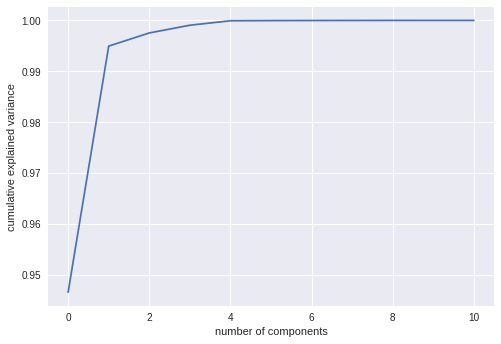

In [5]:
# Variância explicada de acordo com a quantidade de autovetores
pca = PCA().fit(X_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [6]:
#  94.65% da variância nos dados é explicada pelo primeiro componente principal
np.cumsum(pca.explained_variance_ratio_)

array([0.94657698, 0.99494528, 0.99753445, 0.99905342, 0.99992697,
       0.99996154, 0.9999809 , 0.99999037, 0.99999878, 1.        ,
       1.        ])

In [7]:
# Fazendo a redução da dimensionalidade
k = 1 # 
pca = PCA(n_components=k)
pca_1 = pca.fit_transform(X_data)
print(pca_1.shape)
print("")
print(pca_1)

(1599, 1)

[[-13.22490501]
 [ 22.03772361]
 [  7.16267333]
 ...
 [ -3.43135351]
 [  1.13287834]
 [ -3.8743766 ]]


## 2) PCA com Numpy e decomposição espectral da matriz de covariância

### Centralizar a matriz de dados original $\tilde{X}$ obtendo a matriz $X$.
Centralizar a matriz de dados original obtendo a matriz X.
A centralização de dados caracteriza-se pela subtração dos dados amostrais de cada variável, da sua média amostral.
\begin{equation}
X = \tilde{X} - \mu 
\end{equation}

In [8]:
# Centralizando a matriz de dados
X_data_cet = np.array(X_data)
mean_x = np.mean(X_data_cet, axis=0)
X_data_cet = X_data_cet - mean_x
print(X_data_cet.shape)
print(mean_x.shape)
print(X_data_cet.shape)

(1599, 11)
(11,)
(1599, 11)


### Calcular a matriz de covariância dos dados treinamento de duas maneiras:
   
* 1) Utilizado base de dados original $\tilde{X}$ (não centralizada):
\begin{align} np.cov(\tilde{X}) \end{align}


In [9]:
# Calculando a matriz de covariância
cov_mat_X = np.cov(X_data, rowvar=False)
print(cov_mat_X.shape)
# Imprimido os primeiros valores
print(cov_mat_X[:5])

(11, 11)
[[ 3.03141639e+00 -7.98514168e-02  2.27820004e-01  2.81756262e-01
   7.67869249e-03 -2.80092149e+00 -6.48234586e+00  2.19522358e-03
  -1.83585704e-01  5.40100916e-02 -1.14421153e-01]
 [-7.98514168e-02  3.20623777e-02 -1.92716208e-02  4.84190976e-04
   5.16586920e-04 -1.96735904e-02  4.50425692e-01  7.44366516e-06
   6.49469930e-03 -7.92143384e-03 -3.86002214e-02]
 [ 2.27820004e-01 -1.92716208e-02  3.79474831e-02  3.94342700e-02
   1.86872478e-03 -1.24252114e-01  2.27697274e-01  1.34174581e-04
  -1.62975823e-02  1.03277145e-02  2.28151729e-02]
 [ 2.81756262e-01  4.84190976e-04  3.94342700e-02  1.98789713e+00
   3.69017590e-03  2.75861145e+00  9.41644148e+00  9.45410862e-04
  -1.86442890e-02  1.32094136e-03  6.32189598e-02]
 [ 7.67869249e-03  5.16586920e-04  1.86872478e-03  3.69017590e-03
   2.21514265e-03  2.73830308e-03  7.33867502e-02  1.78217568e-05
  -1.92574496e-03  2.96187795e-03 -1.10915178e-02]]


### Calcular a decomposição espectral da matriz de covariância dos dados, isto é, $cov(X) = QΛQ^T$, usando a função do NumPy:

\begin{equation}
 cov(X) = QΛQ^T
\end{equation}

\begin{equation}
 w, Q =  np.linalg.eigh(cov(X))
\end{equation}

* $w$ trata-se dos autovalores
* $Q$ trata-se dos autovetores

obtendo-se os autovalores w e seus autovetores associados nas colunas de Q.
Atenção: os autovalores (e seus autovetores associados) devem ser ordenados em ordem decrescente.

In [10]:
cov = np.cov(X_data_cet.T) / X_data_cet.shape[0] # Get covariance matrix

In [11]:
# Calcular a decomposição espectral 
w, Q = np.linalg.eigh(cov)
print(w.shape)
print(Q.shape)
print(w)
print(Q)

(11,)
(11, 11)
[3.51146133e-10 9.09942182e-07 6.30267925e-06 7.09597783e-06
 1.45044764e-05 2.58891366e-05 6.54371707e-04 1.13784573e-03
 1.93952613e-03 3.62322769e-02 7.09072593e-01]
[[-9.42137146e-04  1.11894679e-02 -1.62056112e-02  6.49066070e-02
  -1.11415873e-02 -7.93123729e-02 -9.81476468e-02  2.65092214e-01
   9.53135980e-01 -2.38994985e-02  6.13247431e-03]
 [-7.18832280e-04 -9.15867655e-02  4.28631866e-01 -3.38841054e-01
  -4.64366208e-01 -6.89241790e-01  4.11570558e-02 -7.27374987e-03
  -2.51315387e-02 -2.00966661e-03 -3.84465551e-04]
 [-5.84467646e-05 -1.05489073e-01  7.60466107e-01 -3.27123399e-01
   2.05507873e-01  5.04044257e-01 -4.14815020e-02  9.83215158e-03
   7.37082746e-02 -3.03480788e-03 -1.70902595e-04]
 [-4.12747476e-04 -1.48602896e-03 -6.93128776e-03  4.13432131e-03
  -2.49458552e-03  5.76573957e-03  1.76626862e-01 -9.43177990e-01
   2.80913620e-01  1.11348551e-02 -8.64894648e-03]
 [-1.81878311e-03  9.80249498e-01  7.21971030e-02 -1.32518260e-01
  -1.13948493e-01 

In [12]:
# Ordenando os autovalores de forma decrescentes
index = np.argsort(w)[::-1] #Obter índices para ordenação decrescente dos autovalores
w_ord = w[index]

# Ordenando os autovetores de forma decrescentes
Q_ord = Q[:,index]

print(Q_ord)
print(w_ord)

[[ 6.13247431e-03 -2.38994985e-02  9.53135980e-01  2.65092214e-01
  -9.81476468e-02 -7.93123729e-02 -1.11415873e-02  6.49066070e-02
  -1.62056112e-02  1.11894679e-02 -9.42137146e-04]
 [-3.84465551e-04 -2.00966661e-03 -2.51315387e-02 -7.27374987e-03
   4.11570558e-02 -6.89241790e-01 -4.64366208e-01 -3.38841054e-01
   4.28631866e-01 -9.15867655e-02 -7.18832280e-04]
 [-1.70902595e-04 -3.03480788e-03  7.37082746e-02  9.83215158e-03
  -4.14815020e-02  5.04044257e-01  2.05507873e-01 -3.27123399e-01
   7.60466107e-01 -1.05489073e-01 -5.84467646e-05]
 [-8.64894648e-03  1.11348551e-02  2.80913620e-01 -9.43177990e-01
   1.76626862e-01  5.76573957e-03 -2.49458552e-03  4.13432131e-03
  -6.93128776e-03 -1.48602896e-03 -4.12747476e-04]
 [-6.37307290e-05 -2.36654751e-04  2.94578815e-03  6.45262673e-04
   9.47985067e-03  5.70159846e-02 -1.13948493e-01 -1.32518260e-01
   7.21971030e-02  9.80249498e-01 -1.81878311e-03]
 [-2.18857434e-01  9.75265982e-01  2.08968395e-02  2.11894371e-02
   7.86843454e-03 -

Nota: O objetivo do PCA é construir um novo espaço de recursos. Os autovetores são os eixos desse novo espaço de recursos e os autovalores denotam a magnitude da variância ao longo desse eixo. Em outras palavras, um autovalor mais alto significa mais variância no eixo principal correspondente. Portanto, o conjunto de eixos com as variâncias mais altas são os recursos mais importantes neste novo espaço de recursos, pois eles contêm a maioria das informações. Obtendo as primeiras K colunas da matriz de autovetores, que têm os K maiores autovalores, formamos o que é chamado de matriz de projeção. O produto escalar de nossa matriz de dados e matriz de projeção, o que parece muito legal, mas na verdade é muito simples, é o espaço reduzido de recursos, o resultado do PCA.

In [13]:
# Ralizando a redução de dimensionalidade PCA
pca_2 = np.dot(X_data_cet, Q_ord[:, :k])
print(pca_2.shape)
print(pca_2)

(1599, 1)
[[ 13.22490501]
 [-22.03772361]
 [ -7.16267333]
 ...
 [  3.43135351]
 [ -1.13287834]
 [  3.8743766 ]]


In [14]:
# Calculando a Variância explicada de acordo com a quantidade de autovetores
variance_explained = []
for i in w_ord:
     variance_explained.append((i/sum(w_ord))*100)

print(variance_explained)
print("")
## Identificação de componentes que explicam pelo menos 95%
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

[94.65769763954631, 4.836830457481654, 0.258917182866071, 0.15189679843916887, 0.08735539896340852, 0.0034560721817209297, 0.001936276139805361, 0.0009472780792098818, 0.0008413766282165817, 0.00012147279814401443, 4.6876278779185474e-08]

[ 94.65769764  99.4945281   99.75344528  99.90534208  99.99269748
  99.99615355  99.99808983  99.9990371   99.99987848  99.99999995
 100.        ]


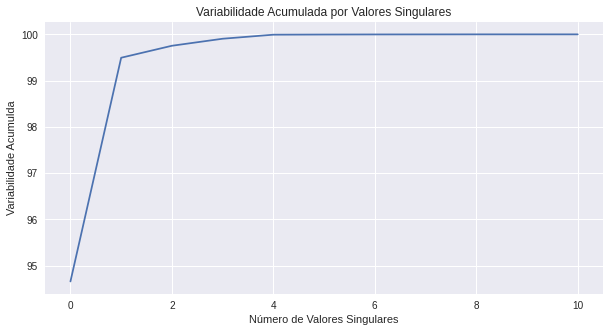

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance_explained)
plt.title('Variabilidade Acumulada por Valores Singulares')
plt.xlabel("Número de Valores Singulares")
plt.ylabel("Variabilidade Acumulda")
plt.savefig("vari_x_singulares.png", bbox_inches='tight')
plt.show()

## 3) PCA com Numpy e SVD

In [16]:
# Calculate SVD com os dados 
U, S, Vt = np.linalg.svd(X_data_cet, full_matrices=False)
print('U: ', U.shape, 
      '\nS: ', S.shape, 
      '\nVt: ', Vt.shape)

U:  (1599, 11) 
S:  (11,) 
Vt:  (11, 11)


In [17]:
# Calculando a Variabilidade acumulada
varia_acum = np.cumsum(S**2) / np.sum(S**2)
print(varia_acum)

[0.94657698 0.99494528 0.99753445 0.99905342 0.99992697 0.99996154
 0.9999809  0.99999037 0.99999878 1.         1.        ]


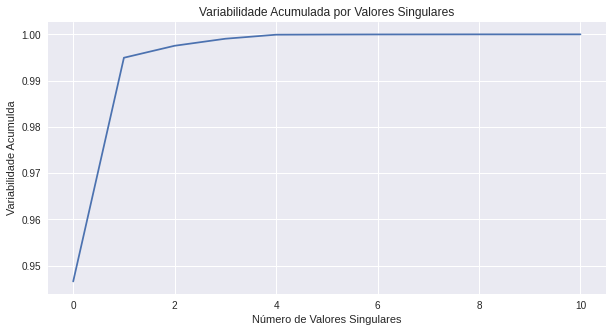

In [18]:
# Gerando um gráco de número de valores singulares versus variabilidade acumulada.
y_plot = varia_acum
#x_plot = np.array(range(len(S)))

plt.figure(figsize=(10, 5))
plt.plot(y_plot)
plt.title('Variabilidade Acumulada por Valores Singulares')
plt.xlabel("Número de Valores Singulares")
plt.ylabel("Variabilidade Acumulda")
plt.savefig("vari_x_singulares.png", bbox_inches='tight')
plt.show()

In [19]:
n_vari_acum = 0.95 # Variabilidade acumulada esperada
r_melhores = [ n for n, i in enumerate(varia_acum) if i > n_vari_acum ][0]
print( 'Variabilidade acumulada: {:.2f}%, até o {:d}-ésimo autovalor.'.format(100 * varia_acum[r_melhores], r_melhores))

Variabilidade acumulada: 99.49%, até o 1-ésimo autovalor.


In [20]:
varia_acum[:r_melhores]

array([0.94657698])

In [21]:
# Ralizando a redução de dimensionalidade PCA
V_new  = Vt[:r_melhores,:].T 
pca_3 = np.dot( X_data_cet, V_new)
#X_test_new  = np.dot( X_test_cent,  V_new )

print( 'Dimensões: \nX_train: {:} --> X_train_new:  {:}'\
      .format(X_data_cet.shape, pca_3.shape) )

print( 'V:       {:} --> V_hat: {:}'\
      .format(Vt.shape, V_new.shape) )

Dimensões: 
X_train: (1599, 11) --> X_train_new:  (1599, 1)
V:       (11, 11) --> V_hat: (11, 1)


In [22]:
pca_3

array([[ 13.22490501],
       [-22.03772361],
       [ -7.16267333],
       ...,
       [  3.43135351],
       [ -1.13287834],
       [  3.8743766 ]])